In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [4]:
data=pd.read_csv('wine.csv')

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

# K-Means Clustering

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


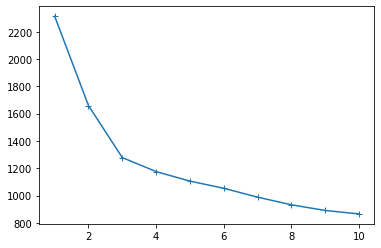

In [10]:
wcss = []
for i in range(1,11):
    model = KMeans(init='k-means++', n_clusters=i)
    model.fit(data_scaled)
    y_pred = model.fit_predict(data_scaled)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,'+-')

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
model.fit(data_scaled)
y_kmeans = model.fit_predict(data_scaled)

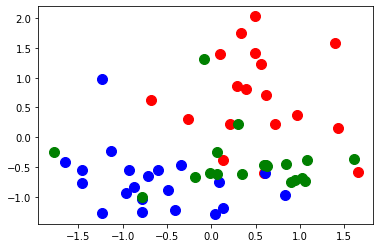

In [13]:
plt.scatter(data_scaled[y_kmeans == 0,0],data_scaled[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1,0],data_scaled[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2,0],data_scaled[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')

# Agglomerative HC

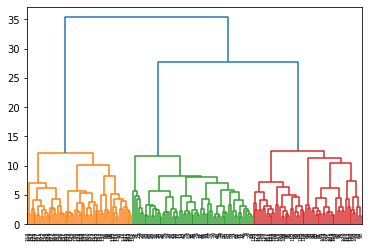

In [14]:
dendrogram= dendrogram(linkage(data_scaled,method ='ward'))

In [15]:
hc = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data_scaled)

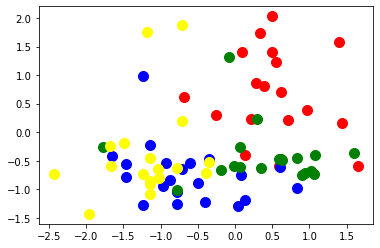

In [16]:
plt.scatter(data_scaled[y_kmeans == 0,0],data_scaled[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1,0],data_scaled[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2,0],data_scaled[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(data_scaled[y_kmeans == 3,0],data_scaled[y_kmeans == 3,1],s=100,c='yellow',label='Cluster 4')